In [1]:
#importing statements for libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
#reading the chicago crime data set for year 2020 till date
df = pd.read_csv('Crimes_-_2020.csv')
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)
df['time_hour']= df['Date'].apply(lambda x: x.hour) #getting time data
df['month']=df['Date'].apply(lambda x: x.month) #getting month data
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,time_hour,month
count,1.084740e+05,108474.000000,108474.000000,108471.000000,108474.000000,1.077060e+05,1.077060e+05,108474.0,107706.000000,107706.000000,108474.000000,108474.000000
mean,1.197969e+07,1134.628289,11.116710,22.814660,37.668842,1.164940e+06,1.884830e+06,2020.0,41.839562,-87.670282,12.922166,3.664380
std,7.261430e+05,691.827318,6.913048,13.685286,21.439931,1.620089e+04,3.163948e+04,0.0,0.087016,0.058951,6.663892,1.937681
min,2.488900e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2020.0,41.644590,-87.934567,0.000000,1.000000
25%,1.198154e+07,611.000000,6.000000,10.000000,23.000000,1.152956e+06,1.857875e+06,2020.0,41.765254,-87.713701,9.000000,2.000000
50%,1.202350e+07,1021.000000,10.000000,23.000000,32.000000,1.166524e+06,1.890014e+06,2020.0,41.853788,-87.664450,14.000000,4.000000
75%,1.206528e+07,1653.000000,16.000000,34.000000,56.000000,1.176651e+06,1.907922e+06,2020.0,41.903113,-87.627522,18.000000,5.000000
max,1.211118e+07,2535.000000,31.000000,50.000000,77.000000,1.205112e+06,1.951527e+06,2020.0,42.022586,-87.524618,23.000000,7.000000


In [6]:
#getting column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108474 entries, 2020-07-13 06:00:00 to 2020-01-01 15:00:00
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    108474 non-null  int64         
 1   Case Number           108474 non-null  object        
 2   Date                  108474 non-null  datetime64[ns]
 3   Block                 108474 non-null  object        
 4   IUCR                  108474 non-null  object        
 5   Primary Type          108474 non-null  object        
 6   Description           108474 non-null  object        
 7   Location Description  107939 non-null  object        
 8   Arrest                108474 non-null  bool          
 9   Domestic              108474 non-null  bool          
 10  Beat                  108474 non-null  int64         
 11  District              108474 non-null  int64         
 12  Ward                  10

In [7]:
#data of number of crimes in chicago from 2020 to tilldate
crimetypes = df['Primary Type'].unique()
print("Total number of crime types in chicago in year 2020 to till date: ",len(crimetypes))
print("Crimetypes:\n", crimetypes)

Total number of crime types in chicago in year 2020 to till date:  31
Crimetypes:
 ['BURGLARY' 'MOTOR VEHICLE THEFT' 'THEFT' 'OTHER OFFENSE'
 'CRIMINAL DAMAGE' 'ROBBERY' 'CRIMINAL SEXUAL ASSAULT'
 'DECEPTIVE PRACTICE' 'WEAPONS VIOLATION' 'OFFENSE INVOLVING CHILDREN'
 'HOMICIDE' 'ASSAULT' 'BATTERY' 'NARCOTICS'
 'INTERFERENCE WITH PUBLIC OFFICER' 'SEX OFFENSE' 'INTIMIDATION'
 'STALKING' 'CRIMINAL TRESPASS' 'PUBLIC PEACE VIOLATION' 'ARSON'
 'GAMBLING' 'LIQUOR LAW VIOLATION' 'OBSCENITY'
 'CONCEALED CARRY LICENSE VIOLATION' 'KIDNAPPING' 'PROSTITUTION'
 'HUMAN TRAFFICKING' 'PUBLIC INDECENCY' 'OTHER NARCOTIC VIOLATION'
 'CRIM SEXUAL ASSAULT']


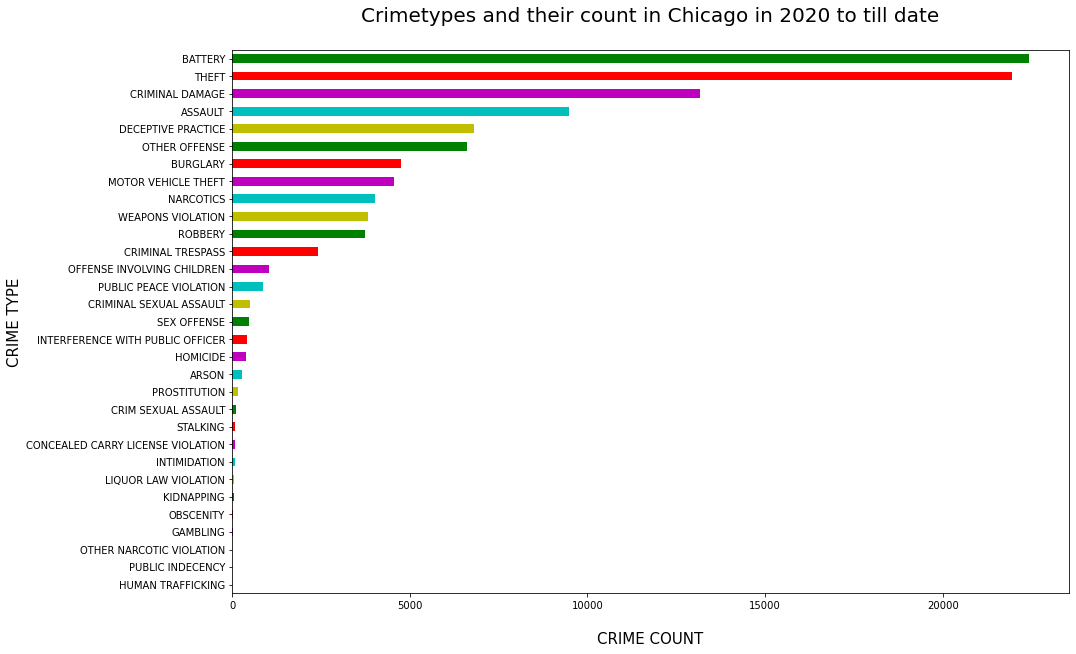

In [86]:
#getting all the crimes in chicago in year 2020 to till date
df.groupby(df['Primary Type']).size().sort_values(ascending = True).head(35).plot(kind ='barh',color = ['g', 'y', 'c', 'm', 'r'],figsize=(15,10))
plt.xlabel('\nCRIME COUNT',fontsize='15')
plt.ylabel("CRIME TYPE",fontsize='15')
plt.title("Crimetypes and their count in Chicago in 2020 to till date\n",fontsize="20")
plt.show()

Top 5 crimes and counts: 


,Primary Type,ID
9,DECEPTIVE PRACTICE,6821
1,ASSAULT,9470
6,CRIMINAL DAMAGE,13160
29,THEFT,21941
2,BATTERY,22430


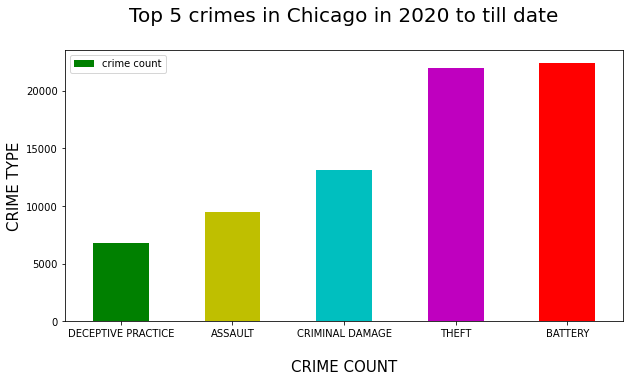

In [8]:
#getting data of top 5 crimes in chicago in year 2020 to till date
topcrimes = df['Primary Type'].value_counts().sort_values(ascending=False).head()
tp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
tp = tp.sort_values(by=['ID'], ascending=False).head()
tp = tp.sort_values(by='ID', ascending=True)
print("Top 5 crimes and counts: ")
display(tp) #displaying as table
print()
colors = ['g', 'y', 'c', 'm', 'r']
tp.plot.bar(x='Primary Type',y='ID',color = colors,label ='crime count',figsize=(10,5))
plt.title("Top 5 crimes in Chicago in 2020 to till date\n",fontsize='20')
plt.xlabel("\nCRIME COUNT",fontsize='15')
plt.ylabel("CRIME TYPE",fontsize='15')
plt.xticks(rotation=360)
plt.show()


In [11]:
#getting month from date field
def month(x):
    return x.strftime("%B")
df['Month']= df['Date'].apply(month)

In [14]:
#Monthly data of most occuring crimes in Chicago in 2020 to till date
theft ={} 
battery= {}
criminaldamage = {}
assault = {}
deceptivepractice = {}

months = df['Month'].unique()
for month in months :
    theft[month]=0
    battery[month]=0
    criminaldamage[month]=0
    assault[month]=0
    deceptivepractice[month]=0

for element in df[df["Primary Type"]=="BATTERY"]["Month"]:
    if element in battery.keys():
        battery[element] += 1

for element in df[df["Primary Type"]=="THEFT"]["Month"]:
    if element in theft.keys():
        theft[element] += 1
        
for element in df[df["Primary Type"]=="CRIMINAL DAMAGE"]["Month"]:
    if element in criminaldamage.keys():
        criminaldamage[element] += 1
        
for element in df[df["Primary Type"]=="ASSAULT"]["Month"]:
    if element in assault.keys():
        assault[element] += 1
        
for element in df[df["Primary Type"]=="DECEPTIVE PRACTICE"]["Month"]:
    if element in deceptivepractice.keys():
        deceptivepractice[element] += 1

#preparing data for plotting
months=['January','February','March','April','May','June','July']
theft_l= [(i,theft[i]) for i in months]
battery_l = [(i,battery[i]) for i in months]
criminaldamage_l = [(i,criminaldamage[i]) for i in months]
assault_l= [(i,assault[i]) for i in months]
deceptivepractice_l = [(i,deceptivepractice[i]) for i in months]

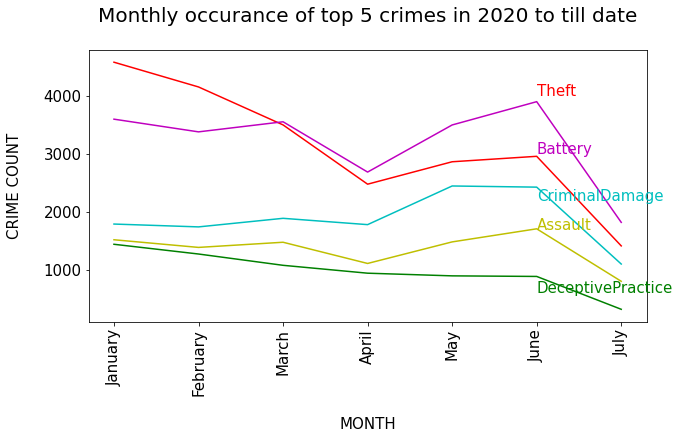

In [15]:
# Plotting the graphs

fig,p = plt.subplots(figsize=(10,5))

# Setting the ticks only on the bottom and the left of the graph
p.get_xaxis().tick_bottom()    
p.get_yaxis().tick_left()   

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

x = [z[0] for z in theft_l]
y = [z[1] for z in theft_l]
p.plot(x,y, color="r")
p.lines[0].set_linestyle("-")

x = [z[0] for z in battery_l]
y = [z[1] for z in battery_l]
p.plot(x,y, color="m")
p.lines[1].set_linestyle("-")

x = [z[0] for z in criminaldamage_l]
y = [z[1] for z in criminaldamage_l]
p.plot(x,y, color="c")
p.lines[2].set_linestyle("-")

x = [z[0] for z in assault_l]
y = [z[1] for z in assault_l]
p.plot(x,y, color="y")
p.lines[3].set_linestyle("-")

x = [z[0] for z in deceptivepractice_l]
y = [z[1] for z in deceptivepractice_l]
p.plot(x,y, color="g")
p.lines[4].set_linestyle("-")


for tick in p.get_xticklabels():
    tick.set_rotation(90)

    
plt.text(5,4000,"Theft",fontsize=15,color="r")
plt.text(5,3000,"Battery",fontsize=15,color="m")
plt.text(5,2200,"CriminalDamage",fontsize=15,color="c")
plt.text(5,1700,"Assault",fontsize=15,color="y")
plt.text(5,600,"DeceptivePractice",fontsize=15,color="g")

p.set_title("Monthly occurance of top 5 crimes in 2020 to till date\n", fontsize=20)
p.set_xlabel("\nMONTH", fontsize=15)
p.set_ylabel("CRIME COUNT\n", fontsize=15)
    
plt.show()

,counts
Arrest,
True,18342
False,90132


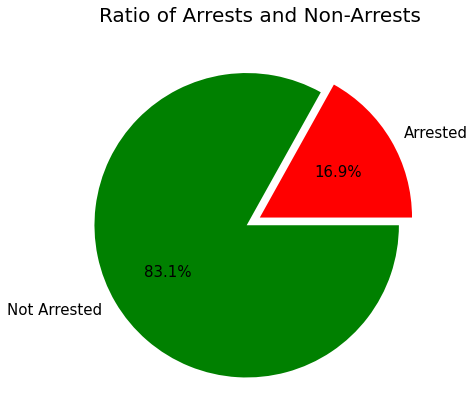

In [16]:
#get ratio of arrest count to non-arrest count
ar = df[['Arrest']]  # get a series from data frame
arrests = pd.DataFrame(ar.groupby('Arrest').size().sort_values(ascending=True).rename('counts'))
display(arrests)
explode=[0,0.10]
plt.figure(figsize=(7,7))
plt.pie(arrests,labels=["Arrested","Not Arrested"], autopct="%.1f%%", explode=explode, colors=["r","g"],textprops={'fontsize': 15})
plt.title("Ratio of Arrests and Non-Arrests",fontsize=20)
plt.show()

District        Primary Type  count
District                                         
1        25          1               THEFT   1659
         2           1             BATTERY    664
         9           1  DECEPTIVE PRACTICE    453
2        29          2             BATTERY   1029
         53          2               THEFT    912
...                ...                 ...    ...
25       561        25             BATTERY   1243
         584        25               THEFT    958
         565        25     CRIMINAL DAMAGE    732
31       586        31             BATTERY      1
         587        31  DECEPTIVE PRACTICE      1

[68 rows x 3 columns]

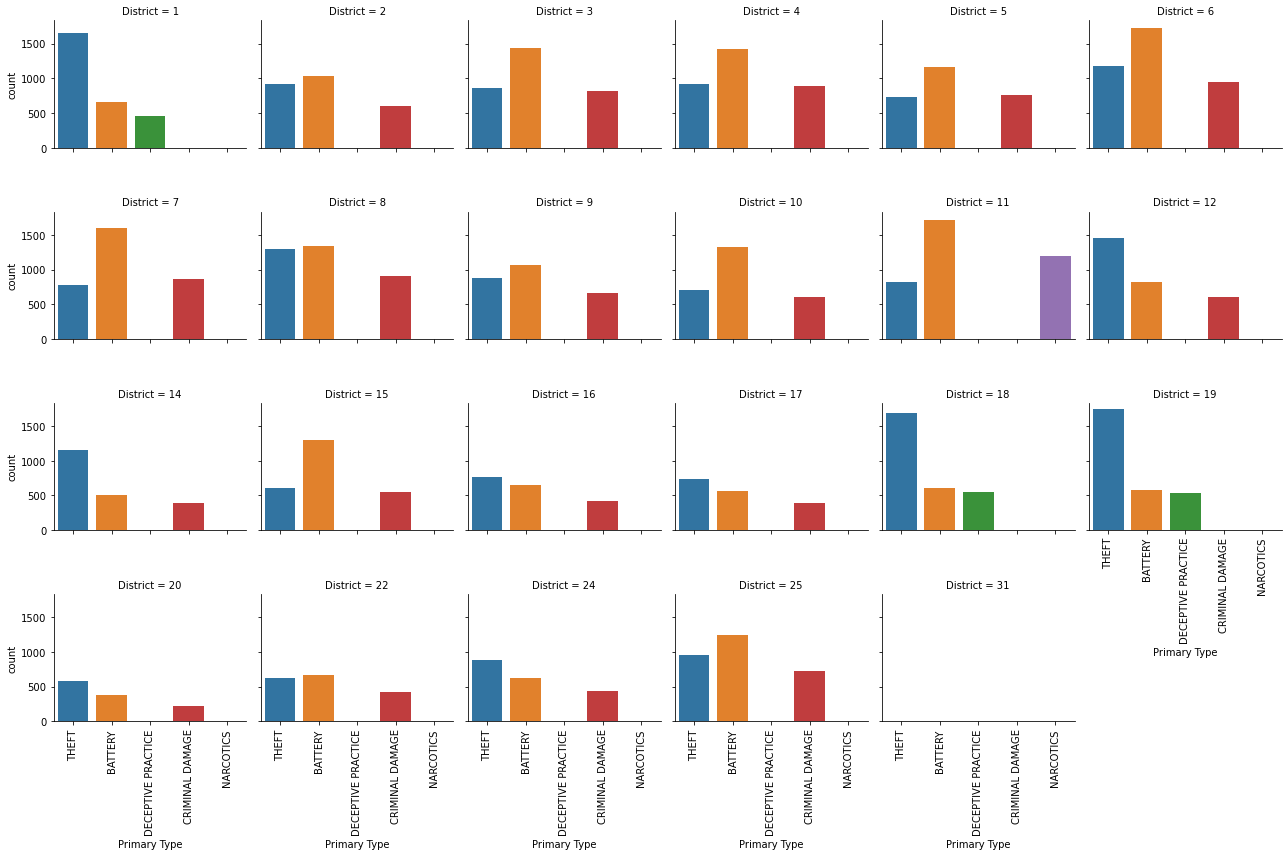

In [95]:
#get data of district wise top crimes
districtcrimes = df.groupby(['District', 'Primary Type']).size().reset_index(name='count').groupby('District').apply(lambda x: x.sort_values('count',ascending=False).head(3))
display(districtcrimes)
#Creating multiple plots
data =sns.catplot("Primary Type",y='count', col="District", col_wrap=6, data=districtcrimes, kind='bar',height=3)
for x in data.axes:
    plt.setp(x.get_xticklabels(), rotation=90)
plt.tight_layout()
#plt.title("Districtwise distribution of crimes in Chicago 2020 till date")
plt.subplots_adjust(hspace=0.5)